In [1]:
"""
This notebook visualizes the training results for all three model architectures
Author: Booy Faassen
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
headers = ["dataset", "epochs", "DA", "layers", "train", "test", "exec.time", "ram", "cpu"]

results_mobile = pd.read_csv("results/mobilenet 27.04.2023.csv", header = 0, delimiter=',')
results_efficient = pd.read_csv("results/efficient 27.04.2023.csv", header = 0, delimiter=',')
results_inception = pd.read_csv("results/inception 27.04.2023.csv", header = 0, delimiter=',')

#print(results_mobile)
#print(results_mobile.size)
#print(results_mobile.shape)

In [10]:
""" Calculate average values """

""" Training accuracy """
averages_mobile = []
for i in range(8):
    averages_mobile.append((results_mobile['train'][i] + results_mobile['train'][i+8] + results_mobile['train'][i+16])/3)

averages_efficient = []
for i in range(8):
    averages_efficient.append((results_efficient['train'][i] + results_efficient['train'][i+8] + results_efficient['train'][i+16])/3)

averages_inception = []
for i in range(8):
    averages_inception.append((results_inception['train'][i] + results_inception['train'][i+8] + results_inception['train'][i+16])/3)

""" Testing accuracy """
averages_mobile_test = []
for i in range(8):
    averages_mobile_test.append((results_mobile['test'][i] + results_mobile['test'][i+8] + results_mobile['test'][i+16])/3)

averages_efficient_test = []
for i in range(8):
    averages_efficient_test.append((results_efficient['test'][i] + results_efficient['test'][i+8] + results_efficient['test'][i+16])/3)

averages_inception_test = []
for i in range(8):
    averages_inception_test.append((results_inception['test'][i] + results_inception['test'][i+8] + results_inception['test'][i+16])/3)

""" Training accuracy across models """
averages_across_models = []
for i in range(8):
    averages_across_models.append((averages_mobile[i] + averages_inception[i] + averages_efficient[i])/3)

averages_across_models_test = []
for i in range(8):
    averages_across_models_test.append((averages_mobile_test[i] + averages_inception_test[i] + averages_efficient_test[i])/3)


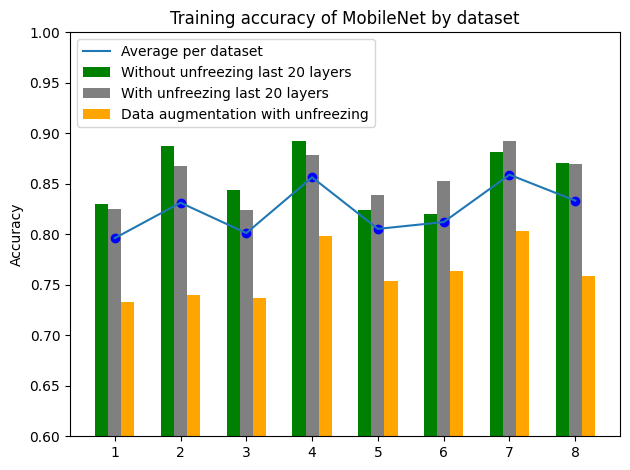

In [12]:
""" MobileNet: Grouping by dataset """

labels = ["1", "2", "3", "4", "5", "6", "7", "8"]
counts1 = results_mobile['train'][0:8]
counts2 = results_mobile['train'][8:16]
counts3 = results_mobile['train'][16:24]

fig, ax = plt.subplots()

width = 0.2
x = np.arange(len(labels))

rects1 = ax.bar(x - width, counts1, width, label='Without unfreezing last 20 layers', color='green')
rects2 = ax.bar(x, counts2, width, label='With unfreezing last 20 layers', color='grey')
rects3 = ax.bar(x + width, counts3, width, label='Data augmentation with unfreezing', color='orange')

#line = plt.axline(xy1=averages, xy2=[1, 2, 3, 4 , 5, 6, 7, 8])
plt.scatter(x, averages_mobile, color='blue')
plt.plot(x, averages_mobile, label='Average per dataset')

ax.set_ylabel('Accuracy')
ax.set_title('Training accuracy of MobileNet by dataset')
ax.set_xticks(x, labels)
ax.set(ylim=(0.6, 1.0))
ax.legend(loc='upper left')

#ax.bar_label(rects1, padding=1)
#ax.bar_label(rects2, padding=1)

fig.tight_layout()
plt.show()

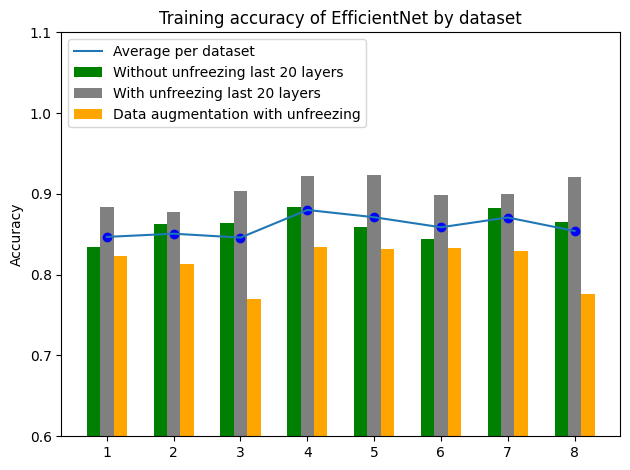

In [13]:
""" EfficientNet: Grouping by dataset """

labels = ["1", "2", "3", "4", "5", "6", "7", "8"]
counts1 = results_efficient['train'][0:8]
counts2 = results_efficient['train'][8:16]
counts3 = results_efficient['train'][16:24]

fig, ax = plt.subplots()

width = 0.2
x = np.arange(len(labels))

rects1 = ax.bar(x - width, counts1, width, label='Without unfreezing last 20 layers', color='green')
rects2 = ax.bar(x, counts2, width, label='With unfreezing last 20 layers', color='grey')
rects3 = ax.bar(x + width, counts3, width, label='Data augmentation with unfreezing', color='orange')

#line = plt.axline(xy1=averages, xy2=[1, 2, 3, 4 , 5, 6, 7, 8])
plt.scatter(x, averages_efficient, color='blue')
plt.plot(x, averages_efficient, label='Average per dataset')

ax.set_ylabel('Accuracy')
ax.set_title('Training accuracy of EfficientNet by dataset')
ax.set_xticks(x, labels)
ax.set(ylim=(0.6, 1.1))
ax.legend(loc='upper left')

#ax.bar_label(rects1, padding=1)
#ax.bar_label(rects2, padding=1)

fig.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

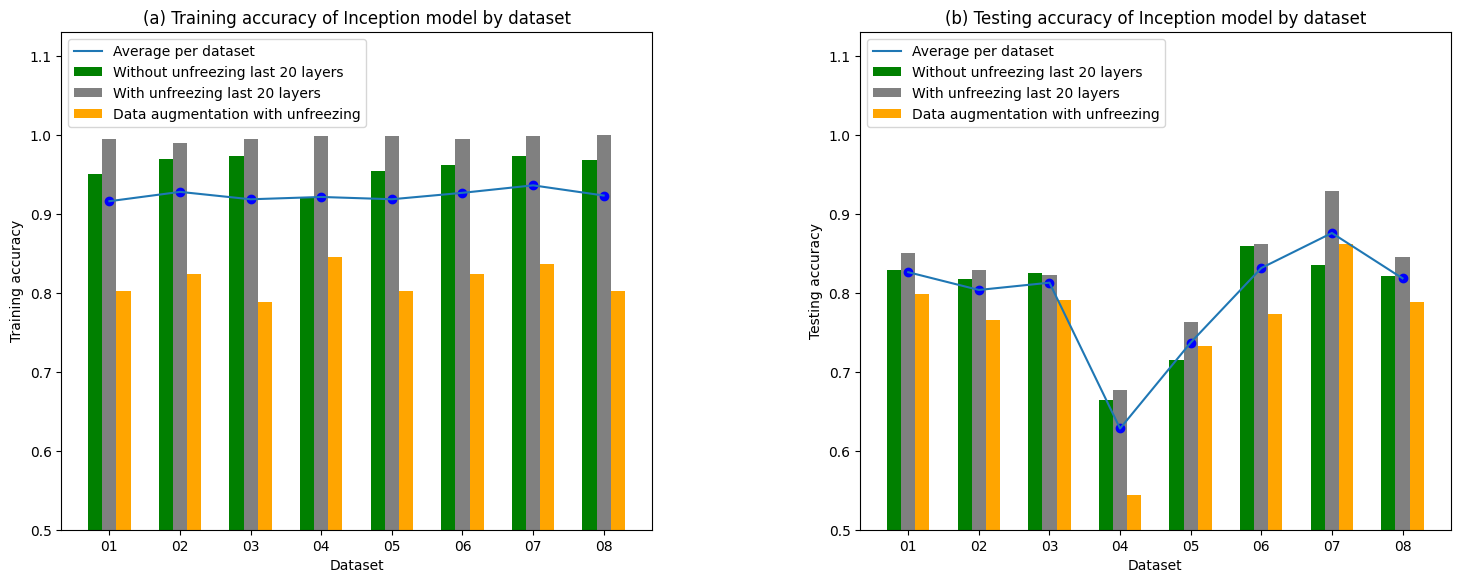

In [20]:
""" Inception: Grouping by dataset """

fig = plt.figure()

rows = 1
columns = 2

fig, ax = plt.subplots(rows, columns)

labels = ["01", "02", "03", "04", "05", "06", "07", "08"]
counts1 = results_inception['train'][0:8]
counts2 = results_inception['train'][8:16]
counts3 = results_inception['train'][16:24]

counts1_test = results_inception['test'][0:8]
counts2_test = results_inception['test'][8:16]
counts3_test = results_inception['test'][16:24]

width = 0.2
x = np.arange(len(labels))

""" First graph - training accuracy """
rects1 = ax[0].bar(x - width, counts1, width, label='Without unfreezing last 20 layers', color='green')
rects2 = ax[0].bar(x, counts2, width, label='With unfreezing last 20 layers', color='grey')
rects3 = ax[0].bar(x + width, counts3, width, label='Data augmentation with unfreezing', color='orange')

ax[0].scatter(x, averages_inception, color='blue')
ax[0].plot(x, averages_inception, label='Average per dataset')

ax[0].set_ylabel('Training accuracy')
ax[0].set_xlabel('Dataset')
ax[0].set_title('(a) Training accuracy of Inception model by dataset')
ax[0].set_xticks(x, labels)
ax[0].set(ylim=(0.5, 1.13))
ax[0].legend(loc='upper left')

""" Second graph - testing accuracy """
rects1 = ax[1].bar(x - width, counts1_test, width, label='Without unfreezing last 20 layers', color='green')
rects2 = ax[1].bar(x, counts2_test, width, label='With unfreezing last 20 layers', color='grey')
rects3 = ax[1].bar(x + width, counts3_test, width, label='Data augmentation with unfreezing', color='orange')

ax[1].scatter(x, averages_inception_test, color='blue')
ax[1].plot(x, averages_inception_test, label='Average per dataset')

ax[1].set_ylabel('Testing accuracy')
ax[1].set_xlabel('Dataset')
ax[1].set_title('(b) Testing accuracy of Inception model by dataset')
ax[1].set_xticks(x, labels)
ax[1].set(ylim=(0.5, 1.13))
ax[1].legend(loc='upper left')

fig.tight_layout(pad=-3.0)
fig.set_figwidth(15)
plt.show()

<Figure size 640x480 with 0 Axes>

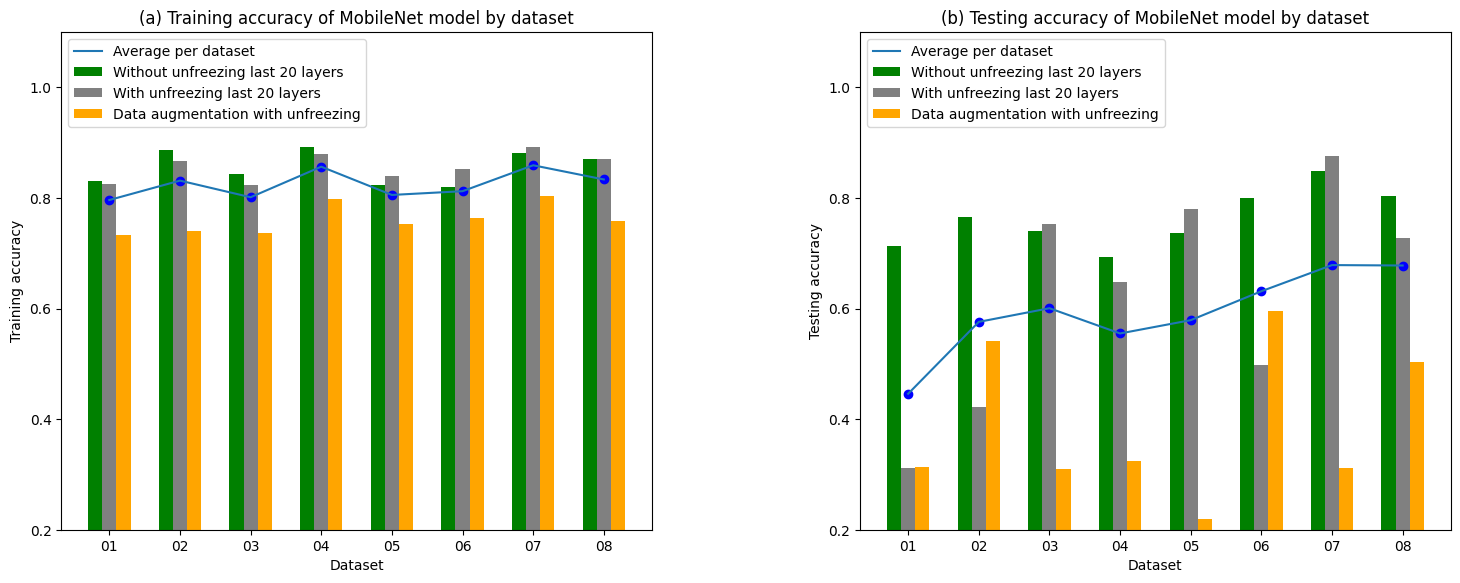

In [22]:
""" MobileNet: Grouping by dataset """

fig = plt.figure()

rows = 1
columns = 2

fig, ax = plt.subplots(rows, columns)

labels = ["01", "02", "03", "04", "05", "06", "07", "08"]
counts1 = results_mobile['train'][0:8]
counts2 = results_mobile['train'][8:16]
counts3 = results_mobile['train'][16:24]

counts1_test = results_mobile['test'][0:8]
counts2_test = results_mobile['test'][8:16]
counts3_test = results_mobile['test'][16:24]

width = 0.2
x = np.arange(len(labels))

""" First graph - training accuracy """
rects1 = ax[0].bar(x - width, counts1, width, label='Without unfreezing last 20 layers', color='green')
rects2 = ax[0].bar(x, counts2, width, label='With unfreezing last 20 layers', color='grey')
rects3 = ax[0].bar(x + width, counts3, width, label='Data augmentation with unfreezing', color='orange')

ax[0].scatter(x, averages_mobile, color='blue')
ax[0].plot(x, averages_mobile, label='Average per dataset')

ax[0].set_ylabel('Training accuracy')
ax[0].set_xlabel('Dataset')
ax[0].set_title('(a) Training accuracy of MobileNet model by dataset')
ax[0].set_xticks(x, labels)
ax[0].set(ylim=(0.2, 1.1))
ax[0].legend(loc='upper left')

""" Second graph - testing accuracy """
rects1 = ax[1].bar(x - width, counts1_test, width, label='Without unfreezing last 20 layers', color='green')
rects2 = ax[1].bar(x, counts2_test, width, label='With unfreezing last 20 layers', color='grey')
rects3 = ax[1].bar(x + width, counts3_test, width, label='Data augmentation with unfreezing', color='orange')

ax[1].scatter(x, averages_mobile_test, color='blue')
ax[1].plot(x, averages_mobile_test, label='Average per dataset')

ax[1].set_ylabel('Testing accuracy')
ax[1].set_xlabel('Dataset')
ax[1].set_title('(b) Testing accuracy of MobileNet model by dataset')
ax[1].set_xticks(x, labels)
ax[1].set(ylim=(0.2, 1.1))
ax[1].legend(loc='upper left')

fig.tight_layout(pad=-3.0)
fig.set_figwidth(15)
plt.show()

<Figure size 640x480 with 0 Axes>

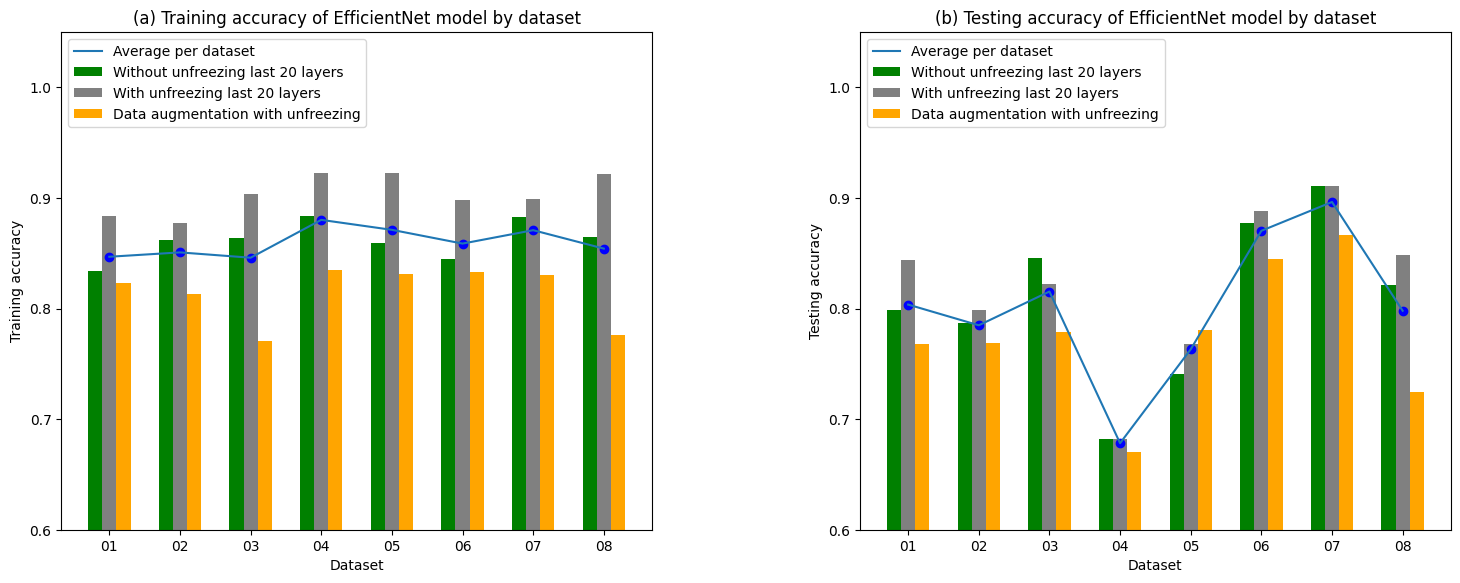

In [25]:
""" EfficientNet: Grouping by dataset """

fig = plt.figure()

rows = 1
columns = 2

fig, ax = plt.subplots(rows, columns)

labels = ["01", "02", "03", "04", "05", "06", "07", "08"]
counts1 = results_efficient['train'][0:8]
counts2 = results_efficient['train'][8:16]
counts3 = results_efficient['train'][16:24]

counts1_test = results_efficient['test'][0:8]
counts2_test = results_efficient['test'][8:16]
counts3_test = results_efficient['test'][16:24]

width = 0.2
x = np.arange(len(labels))

""" First graph - training accuracy """
rects1 = ax[0].bar(x - width, counts1, width, label='Without unfreezing last 20 layers', color='green')
rects2 = ax[0].bar(x, counts2, width, label='With unfreezing last 20 layers', color='grey')
rects3 = ax[0].bar(x + width, counts3, width, label='Data augmentation with unfreezing', color='orange')

ax[0].scatter(x, averages_efficient, color='blue')
ax[0].plot(x, averages_efficient, label='Average per dataset')

ax[0].set_ylabel('Training accuracy')
ax[0].set_xlabel('Dataset')
ax[0].set_title('(a) Training accuracy of EfficientNet model by dataset')
ax[0].set_xticks(x, labels)
ax[0].set(ylim=(0.6, 1.05))
ax[0].legend(loc='upper left')

""" Second graph - testing accuracy """
rects1 = ax[1].bar(x - width, counts1_test, width, label='Without unfreezing last 20 layers', color='green')
rects2 = ax[1].bar(x, counts2_test, width, label='With unfreezing last 20 layers', color='grey')
rects3 = ax[1].bar(x + width, counts3_test, width, label='Data augmentation with unfreezing', color='orange')

ax[1].scatter(x, averages_efficient_test, color='blue')
ax[1].plot(x, averages_efficient_test, label='Average per dataset')

ax[1].set_ylabel('Testing accuracy')
ax[1].set_xlabel('Dataset')
ax[1].set_title('(b) Testing accuracy of EfficientNet model by dataset')
ax[1].set_xticks(x, labels)
ax[1].set(ylim=(0.6, 1.05))
ax[1].legend(loc='upper left')

fig.tight_layout(pad=-3.0)
fig.set_figwidth(15)
plt.show()

<Figure size 640x480 with 0 Axes>

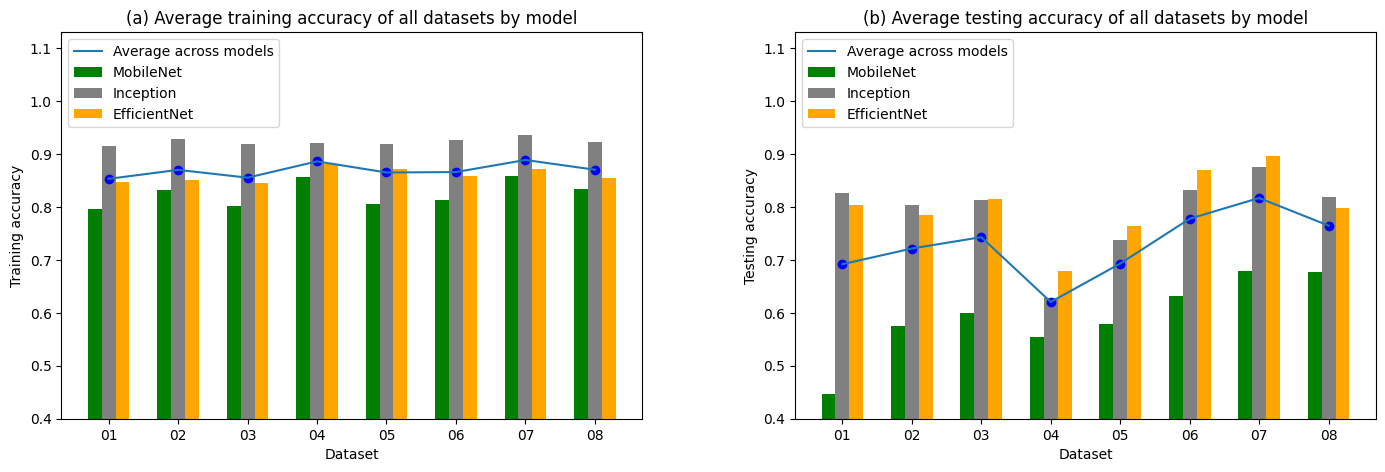

In [27]:
""" Plotting average accuracies by model """

fig = plt.figure()

rows = 1
columns = 2

fig, ax = plt.subplots(rows, columns)

labels = ["01", "02", "03", "04", "05", "06", "07", "08"]
counts1 = averages_mobile
counts2 = averages_inception
counts3 = averages_efficient

counts1_test = averages_mobile_test
counts2_test = averages_inception_test
counts3_test = averages_efficient_test

width = 0.2
x = np.arange(len(labels))

""" First graph - training accuracy """
rects1 = ax[0].bar(x - width, counts1, width, label='MobileNet', color='green')
rects2 = ax[0].bar(x, counts2, width, label='Inception', color='grey')
rects3 = ax[0].bar(x + width, counts3, width, label='EfficientNet', color='orange')

ax[0].scatter(x, averages_across_models, color='blue')
ax[0].plot(x, averages_across_models, label='Average across models')

ax[0].set_ylabel('Training accuracy')
ax[0].set_xlabel('Dataset')
ax[0].set_title('(a) Average training accuracy of all datasets by model')
ax[0].set_xticks(x, labels)
ax[0].set(ylim=(0.4, 1.13))
ax[0].legend(loc='upper left')

""" Second graph - testing accuracy """
rects1 = ax[1].bar(x - width, counts1_test, width, label='MobileNet', color='green')
rects2 = ax[1].bar(x, counts2_test, width, label='Inception', color='grey')
rects3 = ax[1].bar(x + width, counts3_test, width, label='EfficientNet', color='orange')

ax[1].scatter(x, averages_across_models_test, color='blue')
ax[1].plot(x, averages_across_models_test, label='Average across models')

ax[1].set_ylabel('Testing accuracy')
ax[1].set_xlabel('Dataset')
ax[1].set_title('(b) Average testing accuracy of all datasets by model')
ax[1].set_xticks(x, labels)
ax[1].set(ylim=(0.4, 1.13))
ax[1].legend(loc='upper left')

fig.tight_layout(pad=1.0)
fig.set_figwidth(15)
plt.show()